# Depth-First Search

If we want to traverse an entire tree, we have to visit every node. We can do this by DFS, where we go as deep as possible before we backtrack:

The idea is we pick a direction, say left, and keep following pointers as far down left as we can go until we reach null. Once we reach null, we backtrack one up to the parent node and then go right. We keep doing this until we have visited every node in the tree. This is the essence of depth-first search.

> Note that the below implementations work for any Binary Trees, not just Binary Search Trees

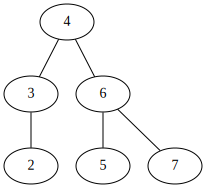

In [2]:
#we'll be using some packages to visualize the trees
import os, sys

#add parent directory
sys.path.append(os.path.dirname(os.getcwd()))

from graph import TreeNode, visualize_tree

def build_dfs_tree():
    # Create the nodes
    root = TreeNode(val=4)
    root.left = TreeNode(val=3)
    root.right = TreeNode(val=6)
    root.left.left = TreeNode(val=2)
    root.right.left = TreeNode(val=5)
    root.right.right = TreeNode(val=7)
    return root

tree_root=build_dfs_tree()
visualize_tree(tree_root)

*There are 3 ways to traverse a tree with DFS:*

## Method 1 - In-Order

An inorder traversal will recurively visit all the nodes in the left subtree, then visit the parent node and finally visit all the nodes in the right subtree. In this case, "visit" could mean performing some operation on it, but here the operation is printing the node.

In [9]:
def inorder(root):
    if not root:
        return    
    inorder(root.left)
    print('Value is', root.val)
    inorder(root.right)

inorder(tree_root)

Value is 2
Value is 3
Value is 4
Value is 5
Value is 6
Value is 7


It is important to note that an inorder traversal will only print the nodes in a sorted order if the tree is a binary search tree.

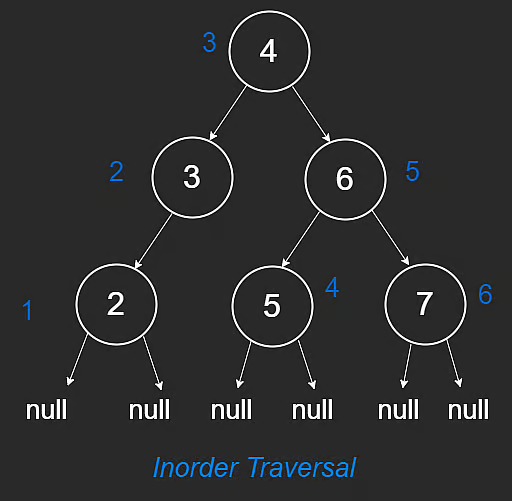

> Since we know all values to the left of a node are smaller, this means we won't hit our base case until we reach the left-most node which is also the smallest node. After visiting this, we will traverse up, visit the parent, visit the right-subtree, then find the next smallest. If you think about this, this is because the left subtree is always smaller, then followed by that node, then followed by the right subtree.



## Method 2 - Pre-Order Traversal

preorder traversal will visit the parent node first, then visit the left subtree and finally visit the right subtree

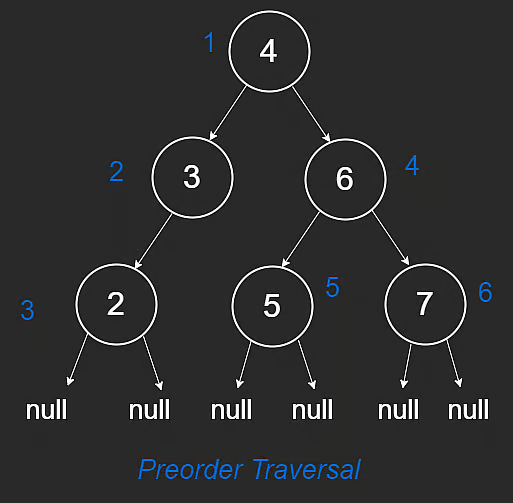

In [11]:
def preorder(root):
    if not root:
        return    
    print('Value is',root.val)
    preorder(root.left)
    preorder(root.right)

preorder(tree_root)

Value is 4
Value is 3
Value is 2
Value is 6
Value is 5
Value is 7


## Method 3 - Post-Order Traversal

visit the left subtree, then the right subtree and finally the parent node last.

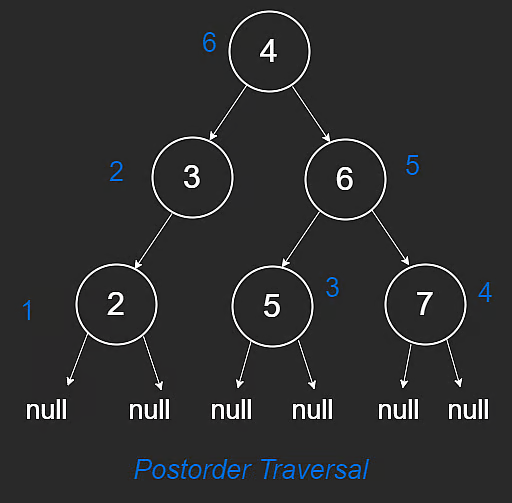

In [12]:
def postorder(root):
    if not root:
        return    
    postorder(root.left)
    postorder(root.right)
    print('Value is', root.val)
postorder(tree_root)


Value is 2
Value is 3
Value is 5
Value is 7
Value is 6
Value is 4


---

## Last In First Out (LIFO)

Note that DFS operates using a LIFO principle, which all can be implemented with a stack too (using iteration) rather than recursion.


In [23]:
def DFS_stack_preorder(root):

  if root is None:
     return

  stack = []
  stack.append(root)

  while stack:
    node = stack.pop()
    print(node.val)

    if node.right:
      stack.append(node.right)
    if node.left:
      stack.append(node.left)

DFS_stack_preorder(tree_root)

4
3
2
6
5
7


In [22]:
def DFS_stack_inorder(root):
    if root is None:
        return

    stack = []
    current = root

    while stack or current:
        # Traverse to the leftmost node
        while current:
            stack.append(current)
            current = current.left

        # Process the current node
        current = stack.pop()
        print(current.val)

        # Move to the right child
        current = current.right

DFS_stack_inorder(tree_root)

2
3
4
5
6
7


In [21]:
def DFS_stack_postorder(root):
    if root is None:
        return

    stack = []
    
    while True:
        while root:
            # Push root's right child and then root to stack
            if root.right:
                stack.append(root.right)
            stack.append(root)

            # Set root as root's left child
            root = root.left
        
        # Pop an item from stack and set it as root
        root = stack.pop()

        # If the popped item has a right child and the
        # right child is not processed yet, then make sure
        # right child is processed before root
        if root.right and (stack and stack[-1] == root.right):
            stack.pop()  # Remove right child from stack
            stack.append(root)  # Push root back to stack
            root = root.right  # change root so that the right child is processed next
        else:
            print(root.val)  # Print root's value
            root = None

        if len(stack) == 0:
            break

# Usage
DFS_stack_postorder(tree_root)

2
3
5
7
6
4


---

### Time Complexity

Since we must visit every node, time complexity is $O(n)$ no matter the height of the tree.

> Interestingly, we can actually build a sorted array from doing an InOrder traversal of a binary search tree. So one sorting alg is first build the BST, then do InOrder Traversal

### Space Complexity

$O(h)$ where h is the height of the tree, which would be $O(log(n))$ for a balanced binary tree or $O(n)$ for a skewed tree

## Problem: Traversal

Given the `root` of a binary tree, return the inorder traversal of its values as a list

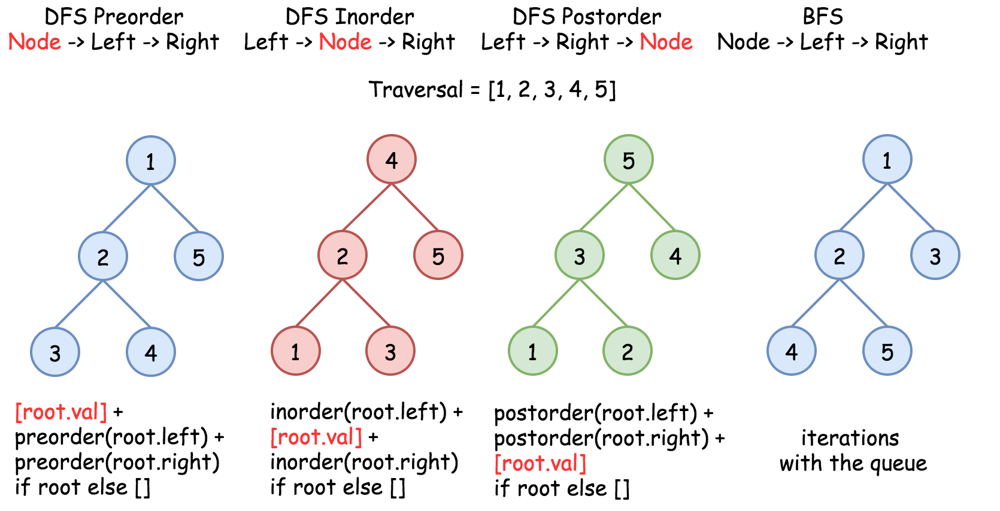

Return the list, dont return the root object. Really interesting!

In [13]:

def preorder(root):
  return [root.val] + preorder(root.left) + preorder(root.right) if root else []

print(preorder(tree_root))

[4, 3, 2, 6, 5, 7]


In [14]:
def inorder(root):
  return  inorder(root.left) + [root.val] + inorder(root.right) if root else []

print(inorder(tree_root))

[2, 3, 4, 5, 6, 7]


In [15]:
def postorder(root):
  return  postorder(root.left) + postorder(root.right) + [root.val] if root else []

print(postorder(tree_root))

[2, 3, 5, 7, 6, 4]


## Problem: Kth smallest value in a BST (Using Stack)

Given the root of a binary search tree, and an integer `k`, return the `k`th smallest value *(1-indexed)* in the tree.

In [ ]:
def kthSmallest(root, k):
        #no recursion! do iteratively by using stack to traverse BST

        #use a stack
        stack = []
        curr = root

        #as long either stack has stuff or curr has stuff
        # each loop here finds a min value and eliminates it
        while stack or curr:
            #while we havent reached past leaf node
            #we will keep going to the leftmost node, to get the min
            while curr:
                #add this node to our stack
                stack.append(curr)
                #go left down
                curr = curr.left

            #check if the most recently explored node is our answer
            curr = stack.pop()
            k -= 1
            if k == 0:
                return curr.val

            #if it isnt, explore the right branch
            #if it turns out this is None, then the next outer while loop will see parent node
            curr = curr.right


## Problem: Reconstruct the Binary Tree (non-BST)

https://neetcode.io/problems/binary-tree-from-preorder-and-inorder-traversal

- You can reconstruct BST using either `pre-order` or `post-order` only
- Note you can get `in-order` by simply sorting `preorder` or `postorder`

- For normal Binary Trees, you can reconstruct unique tree with either `preorder+inorder` or `postorder+inorder` but not `postorder+preorder`
- If you want to use `postorder+preorder` to do unique tree, needs to be `Full Binary Tree` where every part has 2 children
- You can however reconstruct an non unique tree

Consider Subtree:
  - For PreOrder traversal
    - The first elem is always the root node

  - For InOrder traversal,
    - Once we find the root node, all values to the left are in the left subtree, and all values to the right are in the right subtree
  
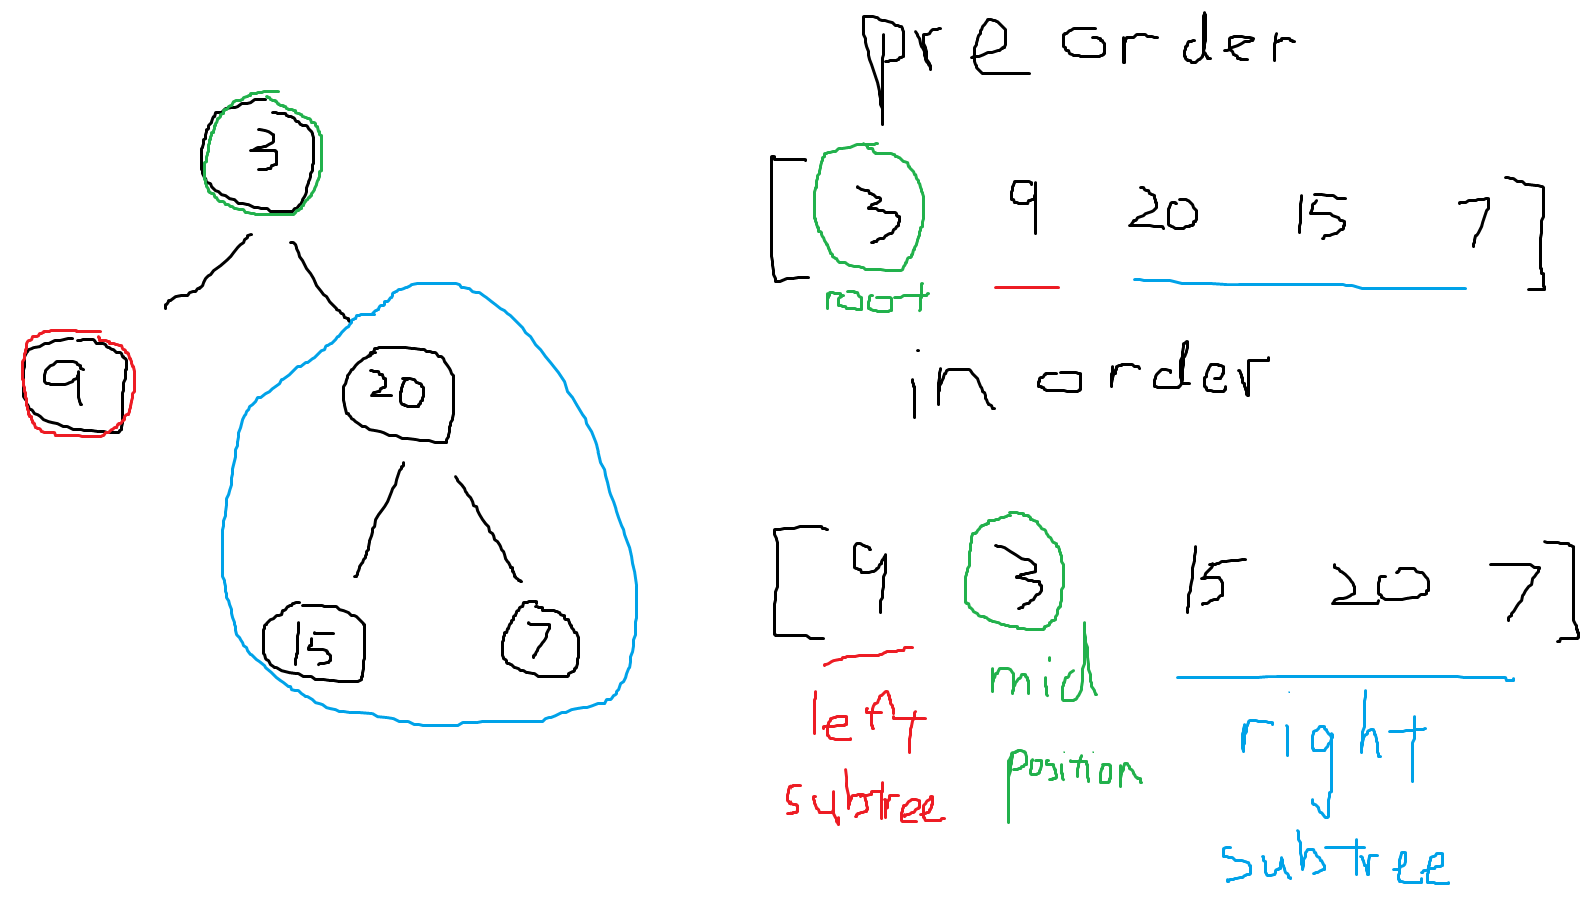

In [1]:
from typing import List
'''
note that first value in PreOrder traversal is always the root
'''


def buildTree(preorder, inorder):
    #if empty subtree - though note that lengths of preorder/inorder should be the same
    if not preorder or not inorder:
        return None
    
    #note that the first node in the original preorder is the root node
    #make a temporary root node of the subtree
    root = TreeNode(val=preorder[0])

    #get the index of where the root node is in `inorder`
    #everything to the left of this is part of left subtree, count how many in left subtree
    #everything to the right is part of the right subtree, count how many in the right subtree

    # the mid tells us how to partition the preorder
    # inorder, the indexes of left subtree is 0 till mid-1 (inclusive) - [0:mid]
    # inorder, the indexes of right subtree is mid+1 till end - [mid+1:]
    # preorder, the indexes of left subtree is of length mid, starting from index 1, so the indexes are 1 till mid (inclusive) - [1:mid+1]
    # preorder, the indexes of right subtree is from mid+1 (inclusive) till the end - [mid+1:]
    mid = inorder.index(preorder[0])

    # in the preorder, from index 1 to mid
    # in the inorder, from index 0 to mid-1
    root.left = buildTree(preorder[1 : mid + 1], inorder[:mid])
    root.right = buildTree(preorder[mid + 1 :], inorder[mid + 1 :])
    return root